# Bibliotecas e DF

In [2]:
%pip install sidetable

import numpy as np
import pandas as pd

import sidetable
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df_tips = sns.load_dataset('tips')
print(df_tips.shape)
df_tips

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (10,6),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

In [5]:
# Rodar DF padrão do SEABORN
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# O que é estatistica ?

O que é estatística
A estatística é uma ciência que se dedica à coleta, análise e interpretação de dados.
Pode ser considerada como a arte de obter insights dos dados e é essencial à tomada de decisão.

Divide-se em:

Descritiva;

Probabilistica;

Inferencial;

## Polulação e Amostra

População: É a métrica como um todo sejas números, palavras, casas e etc.

Amostra: É uma parte da população, ou seja é exatamente uma amostra da população.

In [6]:
# Exemplo de amostra
# .sample() --> Retorna um DF com o número x de linhas aleatórias.
df_tips_sample = df_tips.sample(50)
print(df_tips_sample.shape)
df_tips_sample.head()

(50, 7)


,total_bill,tip,sex,smoker,day,time,size
216,28.15,3.00,Male,Yes,Sat,Dinner,5
80,19.44,3.00,Male,Yes,Thur,Lunch,2
33,20.69,2.45,Female,No,Sat,Dinner,4
161,12.66,2.50,Male,No,Sun,Dinner,2
59,48.27,6.73,Male,No,Sat,Dinner,4


<br/>

Siglas comuns:

| Metric             | Population parameter   | Sample Statistic   |
|:-------------------|:-----------------------|:-------------------|
| size               | $N$                    | $n$                |
| mean               | $\mu$                  | $\bar{x}$          |
| variance           | $\sigma^2$             | $s^2$              |
| standard deviation | $\sigma$               | $s$                |
| correlation        | $\rho$                 | $r$                |

## Tipos de variáveis

VARIÁVEL Numérica ou quantitativa -->

Continua: Números que são difíceis de ser contados (float);

Discreta: Números comuns e fáceis de serem contados. (int)

VARIÁVEL Categórica ou Qualitativa -->

Nominal: Qualidades

Ordinal: Pode ser números desde que estejam em ordem, e também palavras que fazem sentido se estiverem ordenadas.

Dicotômica ou Binária: Duas opções (Sim ou Não)

Policotônica: Mais de duas opções

# Variáveis Númericas

## Média

### Média aritmética

**Considerações:**
- Métrica mais utilizada nos negócios e em modelos de inteligência artifical
- Leva todos os dados em consideração
- Sensível a outliers

<br/>

**Fórmula**:

$$
\text{Mean} = \bar{x} = \frac{\sum_{i=1}^n{x_i}}{n}
$$

In [7]:
df_tips['tip'].mean()

2.99827868852459

In [8]:
df_tips['tip'].agg('mean')

2.99827868852459

In [9]:
np.mean(df_tips['tip'])

2.99827868852459

### Média Ponderada

$$
\text{Trimmed Mean} = \bar{x} = \frac{\sum_{i=p+1}^{n-p}{x_i}}{n - 2p}
$$

In [10]:
np.average(df_tips['tip'], weights=df_tips['size'])

3.2478309409888357

### Média Trimmed

$$
\text{Trimmed Mean} = \bar{x} = \frac{\sum_{i=p+1}^{n-p}{x_i}}{n - 2p}
$$

Elimine valores do fim e do início

In [11]:
values = df_tips['tip'].sort_values().reset_index(drop=True)
values

0       1.00
1       1.00
2       1.00
3       1.00
4       1.01
       ...  
239     6.70
240     6.73
241     7.58
242     9.00
243    10.00
Name: tip, Length: 244, dtype: float64

In [12]:
# Elimine os 10 primeiros e 10 últimos.
p = 10
n = len(values[p:-p])
values[p:-p].sum() / (n - 2*p)

3.1851470588235293

In [13]:
values = df_tips['tip'].sort_values().reset_index(drop=True)

p = 10
values[p:-p].sum() / (values.shape[0] - 2*p)
# values[p:-p].sum() / values[10:-10].shape[0]

2.9007589285714284

In [14]:
# Elimine 10%
stats.trim_mean(values, .1)

2.842704081632653

### Média Harmônica

In [15]:
# F1-score 
stats.hmean(values)

2.482252914784503

## Mediana

A mediana separa os dados em duas metades: 50% dos dados estão abaixo do valor da mediana, e os outros 50% estão acima deste valor.  
A mediana é uma métrica útil principalmente quando queremos ignorar a presença de outliers.

<br/>

**Fórmula:**

Se n é ímpar:
$$\text{Med} = X_{(n+1)/2}$$

Se n é par:
$$\text{Med} = \frac{X_{n/2}+X_{n/2+1}}{2}$$

In [16]:
values = [4,50,3,1,2]

In [17]:
sorted_values = sorted(values)
sorted_values

[1, 2, 3, 4, 50]

In [18]:
# Manualmente
n = len(sorted_values)
pos = int((n+1)/2 -1)
values[pos]

3

In [19]:
# Com Numpy
np.median(values)

3.0

In [20]:
# Manualmente
values = np.array([8,6,7,6,85,10])
sorted_values = np.sort(values)
sorted_values

array([ 6,  6,  7,  8, 10, 85])

In [21]:
n = len(sorted_values)
pos = np.array([n/2, n/2+ 1]) - 1
sorted_values[pos.astype(int)].mean()

7.5

In [22]:
# Com Numpy
np.median(sorted_values)

7.5

In [23]:
# Exemplo com DF
df_tips['tip'].agg('median')

2.9

## Moda

In [24]:
# A moda é o valor que mais se repete
df_tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [25]:
pd.Series.mode(['A','B','C'])

0    A
1    B
2    C
dtype: object

## Medidas Separatizes

### Quartis

In [26]:
# Quartis: Separa os elementos em 4 partes iguais.
df_tips['tip'].quantile([.25, .5, .75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

### Decis

In [27]:
decis = np.arange(1,11) /10
df_tips['tip'].quantile(decis)

0.1     1.500
0.2     2.000
0.3     2.000
0.4     2.476
0.5     2.900
0.6     3.016
0.7     3.480
0.8     4.000
0.9     5.000
1.0    10.000
Name: tip, dtype: float64

### Percentis

In [28]:
# Quantidade de 1% e 99%
df_tips['tip'].quantile([.01,0.99])

0.01    1.0000
0.99    7.2145
Name: tip, dtype: float64

In [29]:
# Com numpy
np.quantile(df_tips['tip'], [[.01,0.99]])

array([[1.    , 7.2145]])

In [30]:
# Outra forma com numpy
np.percentile(df_tips['tip'], [[1,99]])

array([[1.    , 7.2145]])

In [31]:
# Visualização com pandas
df_tips.describe(percentiles=[0.01,0.05,0.995,0.999])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
1%,7.250000,1.000000,1.000000
5%,9.557500,1.440000,2.000000
50%,17.795000,2.900000,2.000000
99.5%,48.317100,8.694700,6.000000
99.9%,50.207360,9.757000,6.000000
max,50.810000,10.000000,6.000000


## Medidas de disperção ou variabilidade

### Amplitude


$$
\text{Amplitude} = \text{Range} = \text{max}(x) - \text{min}(x)
$$

In [32]:
# custom numeric variable
df_tips['tip'].max() - df_tips['tip'].min()

9.0

In [33]:
# all numerical variables
df_tips.select_dtypes('number').apply(lambda x: x.max() - x.min())

total_bill    47.74
tip            9.00
size           5.00
dtype: float64

### Variância


$$
s^2 = \frac{(x_i - \bar{x})^2}{n-1}
$$

In [34]:
# O quanto os dados variam entorno da média.
df_tips['tip'].var()

1.914454638062471

In [35]:
np.var(df_tips['tip'], ddof=1)

1.914454638062471

### Desvio padrão

In [36]:
np.sqrt(df_tips['tip'].var())

1.3836381890011822

In [37]:
df_tips['tip'].std()

1.3836381890011822

## Medidas de Forma

### Assimetria


Coeficiente de assimetria de Pearson:

- Se = 0, a distribuição é simétrica
- Se >0, a distribuição é assimétrica positiva (à diretita)
- Se <0, a distribuição é assimétrica negativa (à esquerda)

<br/>

![](https://github.com/cmcouto-silva/figures/blob/main/statistics/assimetria.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).

In [38]:
stats.skew(df_tips['tip'])

1.4564266884221506

### Curtose

Coeficiente de curtose de Fisher:
- Se = 0, a curva apresenta uma distribuição normal
- Se < 0, a curva é muito achatada
- Se > 0, a curva é muito alongada

<br/>

![](https://github.com/cmcouto-silva/figures/blob/main/statistics/curtose.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).

In [39]:
stats.kurtosis(df_tips['tip'])

3.5495519893455114

## Gráficos Númericos

### Histograma

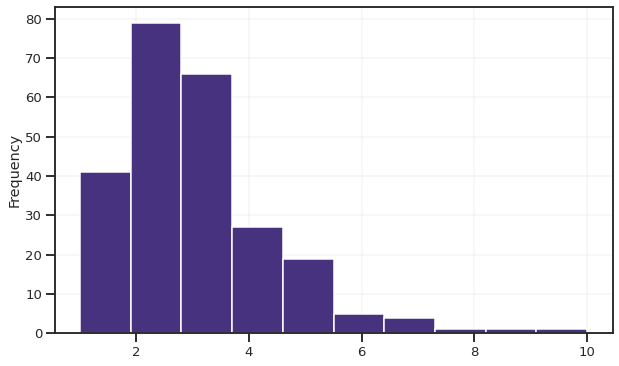

In [40]:
# MATPLOTYLIB
df_tips['tip'].plot.hist();

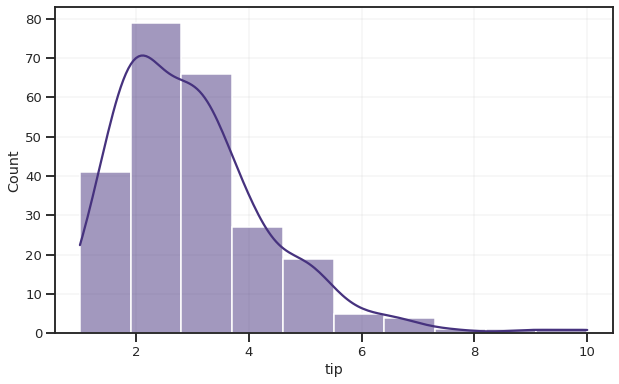

In [41]:
# SEABORN
sns.histplot(x=df_tips['tip'], kde=True, bins=10)

In [42]:
# PLOTLY
px.histogram(df_tips, x='tip')

### Boxplot

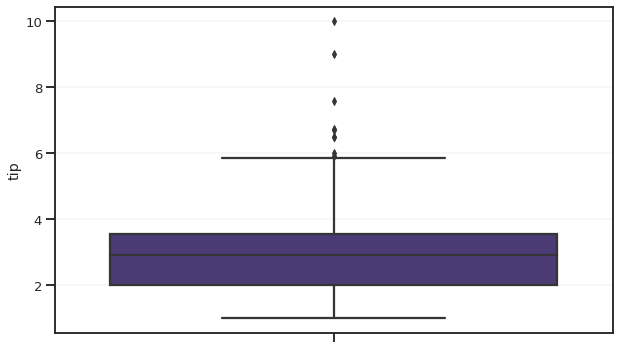

In [43]:
# SEABORN
sns.boxplot(data=df_tips, y='tip')

In [44]:
# PLOTLY
px.box(df_tips, y='tip')

### Mesclado

In [45]:
# px.histogram(df_tips, x='tip', marginal='rug') --> rug: Densidade
px.histogram(df_tips, x='tip', marginal='box')

# Variáveis Categóricas

## Tabela de frequências

In [46]:
# Tabela de frequência absoluta (Números inteiros)
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [47]:
# Tabela de frequência relativa (Porcentagem)
df_tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [48]:
# Tabela de frequência relativa (dataframe)
(
  df_tips['day']
 .value_counts(normalize=True)
 .to_frame('count_pct')
 .rename_axis('day')
 .reset_index()
)

,day,count_pct
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


In [50]:
# sidetable (Frequência absoluta e relativa)
df_tips.stb.freq(['day'])

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


## Gráficos Categóricos

In [51]:
# Pegando a frequência dos dias
df_counts = df_tips.stb.freq(['day'])
df_counts

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


### Grafíco de Pizza (MATPLOTLY - ->.pie)

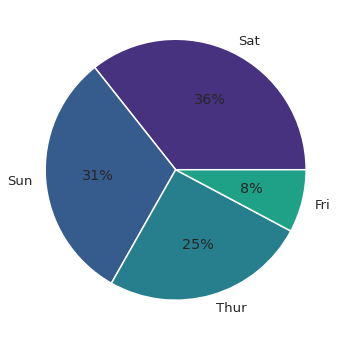

In [52]:
plt.pie(x=df_counts['count'], labels=df_counts.day, autopct='%.0f%%');

### Gráfico de Pizza(PLOTLY - -> .pie )

In [53]:
px.pie(df_counts, names='day', values='count')

### Gráficos de Barras (SEABORN)

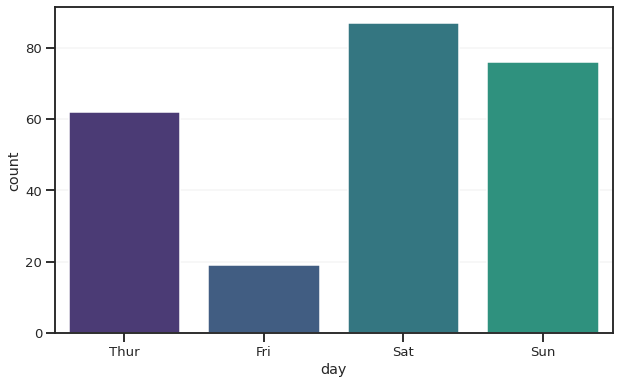

In [54]:
# Plotando gráficos de barras vertical
sns.barplot(data=df_counts, x='day', y='count');

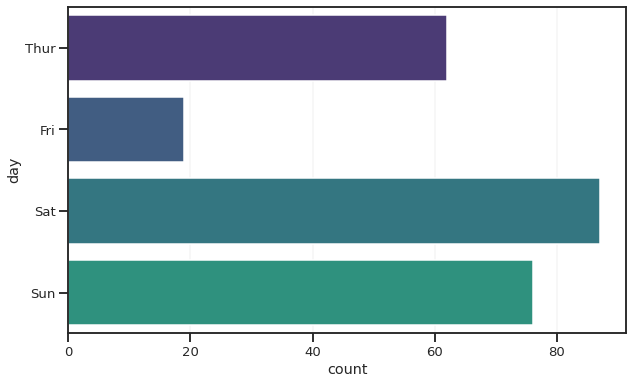

In [55]:
# Plotando gráficos de barras horizontal
sns.barplot(data=df_counts, y='day', x='count');

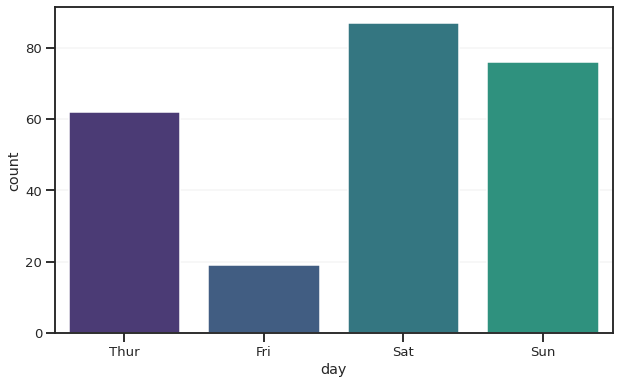

In [56]:
# Plotando gráficos de barras diretamente (Sem pegar a frequência com .stb.freq)
sns.countplot(data=df_tips, x='day');

# Análise Bivariada

![figure book favero](https://github.com/cmcouto-silva/figures/blob/main/statistics/estatisticas_descritivas_bivariadas.png?raw=true)


## Medidas de Correlação

### Covariância

In [57]:
np.cov(df_tips['total_bill'], df_tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [58]:
pd.DataFrame(
    data=np.cov(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


### Correlação

In [59]:
# Quanto mais perto de 1 mais essas variáveis tem correlação.
np.corrcoef(df_tips['total_bill'], df_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [60]:
pd.DataFrame(
    data=np.corrcoef(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [61]:
# Pandas correlation
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Medidas de associação

### Chi-Quadrado

In [62]:
# Mede a associação entre duas variáveis catégoricas.
crosstab = pd.crosstab(df_tips['sex'], df_tips['smoker'])
crosstab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [63]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

In [64]:
print(chi2, p)

0.0 1.0


### Cramer's V

In [65]:
# Coeficiente de associação baseado no  χ2  que varia de 0 a 1, sendo 0 associação mínimas e 1 associação máxima:
stats.contingency.association(crosstab)

0.0028159517336962033

### Gráficos Categóricos

#### Gráfico de Barras (SEABORN - -> .countplot)

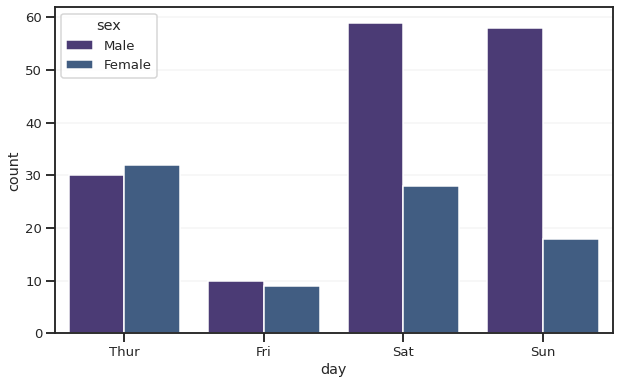

In [66]:
# Countplot com outra variável (seaborn)
sns.countplot(data=df_tips, x='day', hue='sex');

#### Gráfico de Barras (SEABORN - -> .catplot)

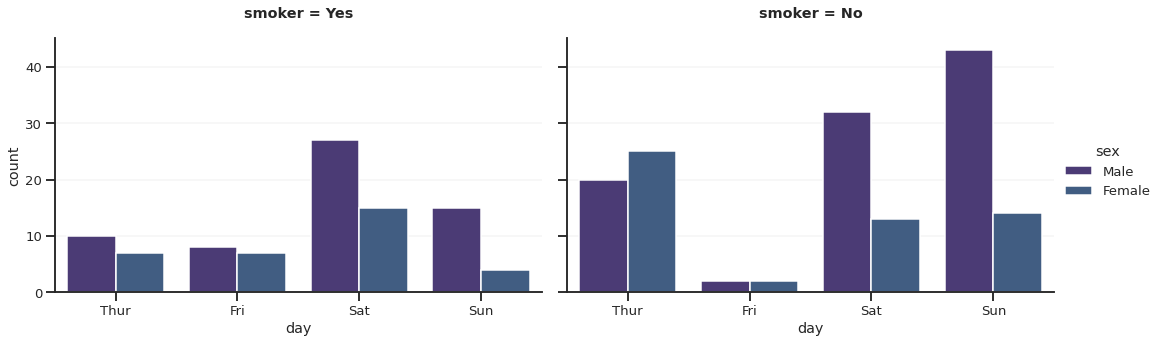

In [67]:
sns.catplot(data=df_tips, x='day', hue='sex', kind='count', col='smoker', aspect=1.5);

#### Gráfico de Barras (PLOTLY - -> .bar)

In [69]:
# Tabela de freq (stb)
df_counts = df_tips.stb.freq(['day','sex'])
df_counts

,day,sex,count,percent,cumulative_count,cumulative_percent
0,Sat,Male,59,24.180328,59,24.180328
1,Sun,Male,58,23.770492,117,47.950820
2,Thur,Female,32,13.114754,149,61.065574
3,Thur,Male,30,12.295082,179,73.360656
4,Sat,Female,28,11.475410,207,84.836066
5,Sun,Female,18,7.377049,225,92.213115
6,Fri,Male,10,4.098361,235,96.311475
7,Fri,Female,9,3.688525,244,100.000000


In [70]:
# Countplot com outra variável (plotly)
px.bar(df_counts, x='day', y='count', color='sex', barmode='group')

### Variáveis Númericas

#### Gráfico Scatterplot

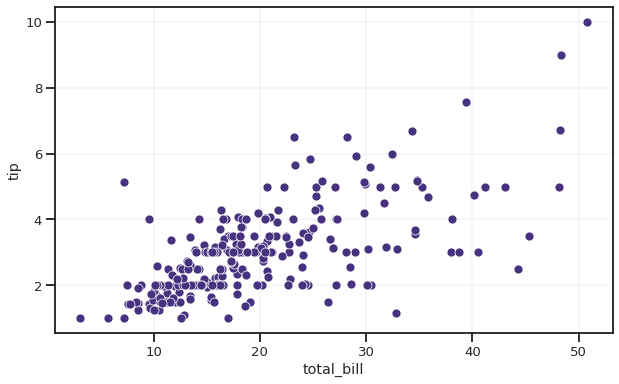

In [71]:
# Scatterplot
sns.scatterplot(data=df_tips, x='total_bill', y='tip');

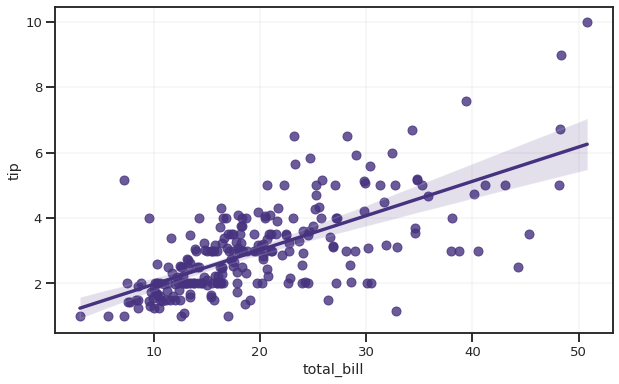

In [72]:
# Lmplot
sns.regplot(data=df_tips, x='total_bill', y='tip');

#### Gráfico de Correlação

In [74]:
# Heatmap (correlation)
dfc = df_tips.corr()
dfc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


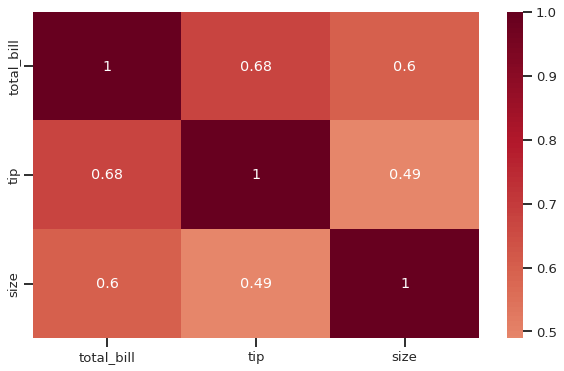

In [75]:
sns.heatmap(dfc, annot=True, cmap='RdBu_r', center=0);

### Variáveis númerica + Categóricas

#### Gráfico Boxplot (SEABORN - -> .boxplot)

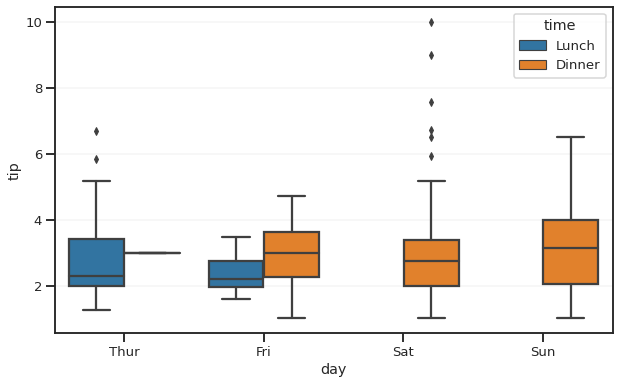

In [76]:
# Boxplot day - total_bill
sns.boxplot(data=df_tips, x='day', y='tip', hue='time', palette='tab10');

#### Gráfico Barplot e Pointplot

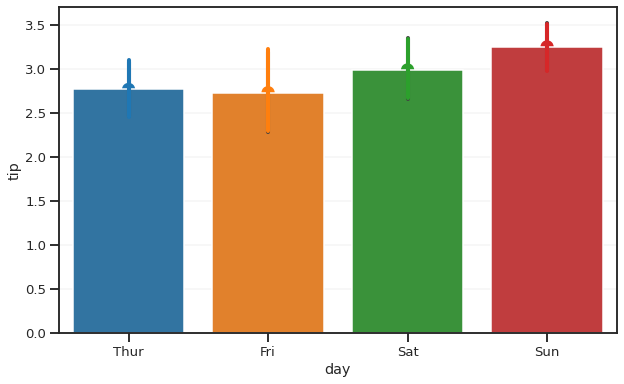

In [77]:
# Barplot/pointplot day - total_bill
sns.barplot(data=df_tips, x='day', y='tip', palette='tab10')
sns.pointplot(data=df_tips, x='day', y='tip', palette='tab10')

#### Gráfico Histograma (SEABORN - -> .histplot)

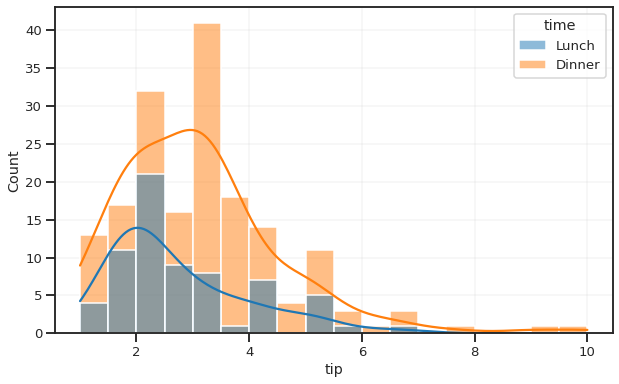

In [78]:
# Histograma total_bill - sex
sns.histplot(data=df_tips, x='tip', hue='time', palette='tab10', kde=True);